Lab5

In [2]:
# we will need pickle to turn our block into a byte object
# sha256 operates one byte at a time
import hashlib
import pickle

# create a new block using sample values
block = {   'timestamp': 1553200425.597771,
            'transactions': ['a','b','c'],
            'prev_hash': '00574faf29dbb37a3b12c2f8f5c05cf03c708313d4ad1d5d968cd2438beea104',
            'merkle_root': 'aa0522a507b6499cb3512494908ac9220',
        }

# pickle the block
pickled_block = pickle.dumps(block)
print(pickled_block)

b'\x80\x04\x95\xba\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\ttimestamp\x94GA\xd7$\xfdJfA\xe1\x8c\x0ctransactions\x94]\x94(\x8c\x01a\x94\x8c\x01b\x94\x8c\x01c\x94e\x8c\tprev_hash\x94\x8c@00574faf29dbb37a3b12c2f8f5c05cf03c708313d4ad1d5d968cd2438beea104\x94\x8c\x0bmerkle_root\x94\x8c!aa0522a507b6499cb3512494908ac9220\x94u.'


In [3]:
# hash the block and output a digest of hexidecimal digits
hashed_block = hashlib.sha256(pickled_block).hexdigest()
print(hashed_block)

533f71d73de65feec417737ce40b8cbf7cfe150c81d5703fb28cf07cef0618f1


In [4]:
# choose 16 because a hex output has 16 digits
for nonce in range(16):
    print(str(nonce)+'_block_nonce')

0_block_nonce
1_block_nonce
2_block_nonce
3_block_nonce
4_block_nonce
5_block_nonce
6_block_nonce
7_block_nonce
8_block_nonce
9_block_nonce
10_block_nonce
11_block_nonce
12_block_nonce
13_block_nonce
14_block_nonce
15_block_nonce


In [5]:
for nonce in range(16):  
    print(hashlib.sha256((str(nonce)+'block_nonce').encode()).hexdigest())

3dd1f24bf0a4e624a2cb40919297bf1b7d7c5e48b3ca395c6e61ee2ad8f51637
2732ba4727c3a2b9b0244654affb31545168a504193a85ec86e63c37b1752190
22be81a20ce2c6de24d1e95d223290f5cc87c866c02a92f70b0a49c0ec337215
4faa8101f2776b329ae6da3c973b6e74a54e963a110d92f53d7b20a82c38fddc
3e557abe5079371b8eff947c1a5c69982a69c7e2e486d89cd3b979352ac0ee8a
422f4b4bc2e211b4964a79e25c2f23b14dab189693ae9ced01068159857a7c9c
3843b8dc09f93eb2e3b39654486d80ee0f6d3b2cd573554a7ab9ff3397c5b6ed
22ea30afd6c105358926b5f7d72ca6944aaee7c9865d1d50653c5c0159763db9
b5e24d04ae74a1fc754882215e22ceb40a4257910a7fc17b81ae5689f0f8d92e
a287c7cacb668082e4a2eebbb74c65e01019fc8c9e1c43a87f8601de189026fd
b50e1115525a09d3c5ed5015c369b1f3278d5a3289de28c99104b7e9de1d7110
091c41e1694a6cf7da4a3b5df8e9656cec6f118ddb19fa733849270d3d084e8d
76793ad61014322d0bc5d25ff5b60d2f136d7e63cc367032224ee356920c8c19
843f1603f6b8e455ac429bb3d7d298ccb5e68f3c4dec5b7211ae717c721e8e2d
a858f37660f2466f26b167b36017509ccf6a586dc6b354d5c362a32302350e7c
82cba63d49f0f1db07006a833

In [6]:
# set the number of leading zeroes
target = 1

# loop through the hashes checking each one
for nonce in range(16):  
    hash = hashlib.sha256((str(nonce)+'block_nonce').encode()).hexdigest()
    print(str(hash))
    
    # check the string up to the indexed difficulty and compare
    # note python string manipulation: '0'*5 = 00000; this is string multiplication
    if hash[:target] == '0'*target:
        print('Block Found!')
        break
        
    # end of range condition
    if nonce == 15: print('Block not found')

3dd1f24bf0a4e624a2cb40919297bf1b7d7c5e48b3ca395c6e61ee2ad8f51637
2732ba4727c3a2b9b0244654affb31545168a504193a85ec86e63c37b1752190
22be81a20ce2c6de24d1e95d223290f5cc87c866c02a92f70b0a49c0ec337215
4faa8101f2776b329ae6da3c973b6e74a54e963a110d92f53d7b20a82c38fddc
3e557abe5079371b8eff947c1a5c69982a69c7e2e486d89cd3b979352ac0ee8a
422f4b4bc2e211b4964a79e25c2f23b14dab189693ae9ced01068159857a7c9c
3843b8dc09f93eb2e3b39654486d80ee0f6d3b2cd573554a7ab9ff3397c5b6ed
22ea30afd6c105358926b5f7d72ca6944aaee7c9865d1d50653c5c0159763db9
b5e24d04ae74a1fc754882215e22ceb40a4257910a7fc17b81ae5689f0f8d92e
a287c7cacb668082e4a2eebbb74c65e01019fc8c9e1c43a87f8601de189026fd
b50e1115525a09d3c5ed5015c369b1f3278d5a3289de28c99104b7e9de1d7110
091c41e1694a6cf7da4a3b5df8e9656cec6f118ddb19fa733849270d3d084e8d
Block Found!


In [10]:
# !!caution!! - setting difficulty too high could result in waiting until the heat death of the universe to find your block
target = 4 # powers of sixteen
nonce = 1
block_found = False

# this will loop until a block is found
while block_found == False:
    # add a nonce value to the block, here it is prepended
    work = hashlib.sha256(bytes(nonce) + pickled_block)
    
    # check to see if the hash meets the target
    if work.hexdigest()[:target] == '0'*target:
        block_found = True
        
        # output some data
        print('Target Difficulty: ' + str(target))
        print('Nonce: ' + str(nonce))
        print('Proof-of-work: ' + work.hexdigest())
        
    # update the nonce before looping
    # this ensures the block is different before it is hashed again    
    nonce += 1

# Change the difficulty value and compare output (and time)
# you may have to wait 10-20 seconds for output to appear below.

Target Difficulty: 4
Nonce: 67220
Proof-of-work: 00003927c8d89164725943089548e9f743623463c2e4fca55e32ba202b46ea45


In [11]:
target = 4
nonce = 1
block_found = False

# access the system clock and record the start time
import time
start = time.time()
while block_found == False:
    work = hashlib.sha256(bytes(nonce) + pickled_block)
    if work.hexdigest()[:target] == '0'*target:
        end = time.time()
        block_found = True
        print('Target Difficulty: ' + str(target))
        print('Nonce: ' + str(nonce))
        print('Proof-of-work: ' + work.hexdigest())
        
        # calculate and print the time; this will output in seconds
        print('Elapsed time: ' + str(end - start))
    nonce += 1

Target Difficulty: 4
Nonce: 67220
Proof-of-work: 00003927c8d89164725943089548e9f743623463c2e4fca55e32ba202b46ea45
Elapsed time: 2.4948885440826416


In [17]:
# secrets provides access to a secure random number generator. 
# Refer to documentation for what this means. 
# Always be cautious when generating random data for important purposes like keys.
import secrets
# generate random data to append to a block
random_data = secrets.token_bytes(4)

target = 4
nonce = 1
block_found = False
start = time.time()
while block_found == False:
    # the block now contains 4 random bytes of data
    work = hashlib.sha256(bytes(nonce) + pickled_block + random_data)
    if work.hexdigest()[:target] == '0'*target:
        end = time.time()
        block_found = True
        print('Target Difficulty: '+ str(target))
        print('Nonce: ' + str(nonce))
        print('Proof-of-work: ' + work.hexdigest())
        print('Elapsed time: ' + str(end - start))
    nonce += 1

Target Difficulty: 4
Nonce: 25600
Proof-of-work: 000061042fc4deca14737b0a2d103637abb99db16cf8c317e382f86107de5e88
Elapsed time: 0.4278385639190674


In [18]:
co = 0x033d76
ex = 0x17
target = co * 2 ** (8 *(ex - 0x3))

print(target)
print(hex(target))

num_zeros = 64 - len(hex(target)[2:])
target = '0x'+'0'*num_zeros + hex(target)[2:]

print(num_zeros)
print(target)

310338180674118587457206844748640968959780028040609792
0x33d760000000000000000000000000000000000000000
19
0x000000000000000000033d760000000000000000000000000000000000000000


In [19]:
# one leading zero to start
diff = 1
prob = 1/16
print(prob)

0.0625


In [21]:
# one leading zero to start
diff = 2
prob = 1/(16**diff)
print(prob)

0.00390625


In [22]:
#loop through a range and print the results
#range(start,stop,step)
for diff in range(1,16,1):
  prob = 1/(16**diff)
  #formatted to show the relative value
  print("%.20f" % prob)

0.06250000000000000000
0.00390625000000000000
0.00024414062500000000
0.00001525878906250000
0.00000095367431640625
0.00000005960464477539
0.00000000372529029846
0.00000000023283064365
0.00000000001455191523
0.00000000000090949470
0.00000000000005684342
0.00000000000000355271
0.00000000000000022204
0.00000000000000001388
0.00000000000000000087


In [23]:
prob=[]
for diff in range(1,11,1):
  prob.append(1/(16**diff))
print(prob)

[0.0625, 0.00390625, 0.000244140625, 1.52587890625e-05, 9.5367431640625e-07, 5.960464477539063e-08, 3.725290298461914e-09, 2.3283064365386963e-10, 1.4551915228366852e-11, 9.094947017729282e-13]


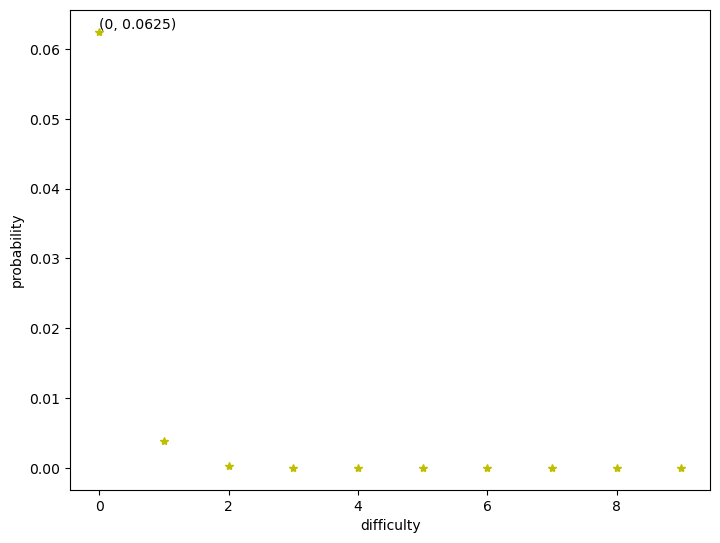

In [24]:
#plot using matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('difficulty')
ax.set_ylabel('probability')
ax.plot(prob,'y*')

ax.text(0, prob[0], f'{(0, prob[0])}', ha='left', va='bottom')
plt.show()

In [25]:
# calculate bitcoin's difficulty
# the maximum target value which was set for the very first block
# 0x00000000ffff0000000000000000000000000000000000000000000000000000 (in hex)
set_size = 0x00000000ffff0000000000000000000000000000000000000000000000000000
print(set_size)
# print(set_s)

26959535291011309493156476344723991336010898738574164086137773096960


In [26]:
# recently found block's proof of work (copied from web for block 856861)
target = 0x000000000000000000033d760000000000000000000000000000000000000000
# print in decimal
print(target)

310338180674118587457206844748640968959780028040609792


In [27]:
# calculate difficulty value
difficulty = set_size / target
print(difficulty)

86871474313761.95
